# `hw1`: Exploration of pulse oximetry data

Deadline: **Monday, November 4, 11:59 PM**. 
- Submit your completed notebook on your personal Github repository created when accepting the assignment.
- All cells must be executable and their outputs should not be erased before submission.
- Homeworks are carried out *individually*.

In [11]:
# Fill in this cell with your personal details:
# - Name: GUENFOUDI Ihabe
# - Student ID: s194071
# - Email: ihabe.guenfoudi@student.uliege

In this homework, you will have to load, clean, and explore pulse oximetry data from the [ OpenOximetry Repository](https://physionet.org/content/openox-repo/1.0.1). This dataset of oxygen desaturation studies notably includes oxygen saturation (SPO2 / SO2) measures from blood samples and unprocessed photoplethysmography (PPG) from pulse oximeters.

The goal of this first homework is to prepare the data and to perform some basic exploratory analysis. The same dataset will be used in the next homeworks, so it is important to understand the data and to prepare it properly.

All documentation about the dataset can be found on the dataset webpage and in the downloaded files.

First, create a [Physionet Account](https://physionet.org/register). Then, read and sign the [Data Use Agreement](https://physionet.org/sign-dua/openox-repo/1.0.1/). Finally, download the files in the [OpenOximetry Repository Files Section](https://physionet.org/content/openox-repo/1.0.1#files). Decompress the dataset in a directory named `data/` at the root of your project. Make sure to add `data/*` to your `.gitignore` file.

# Exercises

- Solve the exercises below by making the best use of the API offered in `numpy`, `pandas` and `matplotlib`.
- You will also need to use the `wfdb` library for reading and writing waveform data (see [WFDB Documentation](https://wfdb.readthedocs.io/en/latest/wfdb.html)).
- For plots, feel free to use `matplotlib`, `seaborn` or `pandas` built-in plotting functions.
- Follow the data visualization principles as best as possible to make your plots effective and readable.
- For each exercise, add Markdown cells to explain what you are doing and to discuss your results.

In [12]:
import warnings
import wfdb as wf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


warnings.simplefilter(action="ignore", category=FutureWarning)

<div class="alert alert-success">
    
**Exercise**. Load the data from `data/patient.csv`, `data/encounter.csv`, and `data/bloodgas.csv` into dataframes. Visualise the raw data, understand the mearning of the different columns and values, drop or combine rows and columns if needed. Justify your choices.

The resulting dataframes should have unique values in columns `patient_id`, `encounter_id` and `('encounter_id', 'date', 'time')`, respectively. It may be preferable to merge columns `date` and `time` in a proper `datetime` column for the last dataframe.
    
</div>

<div class="alert alert-danger">
    
**Advice**. Read the dataset documentation in `data/OpenOximetry_Data_Dictionary_v1.0.0_*.csv`).
    
</div>

In [13]:
df_patient = pd.read_csv("patient.csv")
df_encounter = pd.read_csv("encounter.csv")
df_bloodgas = pd.read_csv("bloodgas.csv")


def no_missing_data(df, id_column, essential_columns):
    df = df.dropna(subset=essential_columns)
    df = df.drop_duplicates(subset=id_column)
    return df


df_patient_cleaned = no_missing_data(
    df_patient, "patient_id", essential_columns=["patient_id"]
)
df_encounter_cleaned = no_missing_data(
    df_encounter, "encounter_id", essential_columns=["encounter_id"]
)
df_bloodgas["datetime"] = pd.to_datetime(
    df_bloodgas["date"] + " " + df_bloodgas["time"]
)

df_bloodgas_cleaned = df_bloodgas.drop_duplicates(subset=["encounter_id", "datetime"])

df_bloodgas_cleaned = df_bloodgas_cleaned.drop(columns=["date", "time"])
#visualize the raw data 
print(df_patient_cleaned.head())
print(df_bloodgas_cleaned.head())

                                          patient_id          site_id  \
0  086c5bb6be06dd4fdb32f43233fb8a5116f3de7e3ca0a2...  ucsf-hypoxialab   
1  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...  ucsf-hypoxialab   
2  0b75db6465cdb03ae94230a424600db33f83317104b998...  ucsf-hypoxialab   
3  0c16265fcc7df3e899067e0e259b43e3751e2daa360d38...  ucsf-hypoxialab   
4  0d8e1b53092a588d5dd5e2f69090924326583b3ac6f04d...  ucsf-hypoxialab   

  assigned_sex   race  ethnicity  
0         Male      1        1.0  
1       Female    NaN        1.0  
2       Female  Asian        1.0  
3         Male     10        1.0  
4          NaN    NaN        1.0  
                                          patient_id  \
0  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
1  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
2  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
3  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
5  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   

              

To prepare the datasets for analysis, I focused on key cleaning steps to ensure that the data was well-organized and consistent.

First, I built a `no_missing_data()` function to handle missing values and duplicate entries within `df_patient` and `df_encounter`. This function removes rows with missing values in crucial ID columns—such as `patient_id` for `df_patient` and `encounter_id` for `df_encounter`—and eliminates any duplicate records. Using this function on each DataFrame helped ensure that each patient and encounter record appeared only once, enhancing data clarity and reliability.

In `df_bloodgas`, I combined the `date` and `time` columns into a single `datetime` column. This integration makes timestamp management more efficient by consolidating all time data into one column. Afterward, I removed duplicate entries based on both `encounter_id` and `datetime` to ensure that each recorded timestamp was unique. Finally, I dropped the original `date` and `time` columns, as they were no longer necessary.

With these adjustments, I now have cleaned and structured datasets, each containing unique IDs and standardized timestamps, which simplifies further analysis and ensures data consistency.



<div class="alert alert-success">
    
**Exercise**. Now that the dataset have been loaded with unique identifier columns, merge them appropriately. Then, only select the following columns: `
   encounter_id', 'patient_id', 'datetime', 'sample', 'assigned_sex', 'race', 'ethnicity', 'age_at_encounter', 'warming', 'ph', 'pco2', 'po2', 'so2', 'cohb', 'methb', 'thb', 'k', 'na', 'ca', 'cl', 'glucose', 'lactate', 'p50', 'cbase', 'ETCO2', 'ETO2', 'ScalcO2', 'RR', 'dev55_HR', 'dev59_HR', 'dev60_HR', 'dev64_HR', 'type' '`.

</div>

In [14]:
df_merged_init = df_patient_cleaned.merge(
    df_encounter_cleaned, how="inner", on="patient_id"
)
df_merged = df_merged_init.merge(
    df_bloodgas_cleaned, how="inner", on=["encounter_id", "patient_id"]
)

selected_columns = [
    "encounter_id",
    "patient_id",
    "datetime",
    "sample",
    "assigned_sex",
    "race",
    "ethnicity",
    "age_at_encounter",
    "warming",
    "ph",
    "pco2",
    "po2",
    "so2",
    "cohb",
    "methb",
    "thb",
    "k",
    "na",
    "ca",
    "cl",
    "glucose",
    "lactate",
    "p50",
    "cbase",
    "ETCO2",
    "ETO2",
    "ScalcO2",
    "RR",
    "dev55_HR",
    "dev59_HR",
    "dev60_HR",
    "dev64_HR",
    "type",
]

df = df_merged[selected_columns]
print(df.shape)
for col in df.columns:
    if df[col].isna().any():
        print(f"{col} has NaN values")
print(df.describe())

(5983, 33)
assigned_sex has NaN values
race has NaN values
ethnicity has NaN values
age_at_encounter has NaN values
warming has NaN values
p50 has NaN values
cbase has NaN values
ETCO2 has NaN values
ETO2 has NaN values
ScalcO2 has NaN values
RR has NaN values
dev55_HR has NaN values
dev59_HR has NaN values
dev60_HR has NaN values
dev64_HR has NaN values
                            datetime       sample    ethnicity  \
count                           5983  5983.000000  5967.000000   
mean   2182-02-11 16:17:23.005181952    13.239846     1.094185   
min              2123-12-28 13:39:00     1.000000     1.000000   
25%              2153-01-02 14:12:30     6.000000     1.000000   
50%              2173-12-04 09:43:00    13.000000     1.000000   
75%              2210-07-20 16:23:00    20.000000     1.000000   
max              2241-08-02 15:18:00    32.000000     2.000000   
std                              NaN     7.757190     0.292110   

       age_at_encounter      warming           p

To prep the data for analysis, I merged and organized it to capture only the most crucial information. 

First, I combined `df_patient_cleaned` with `df_encounter_cleaned` on `patient_id`, creating `df_merged_init` to ensure that each entry had comprehensive patient and encounter data. Then, I merged `df_merged_init` with `df_bloodgas_cleaned` using both `encounter_id` and `patient_id`, producing `df_merged`. This step filtered for records with matching blood gas readings, resulting in a complete dataset across all tables.

Afterward, I refined `df_merged` by selecting only the columns essential for analysis. These included patient and encounter details (`encounter_id`, `patient_id`, `assigned_sex`, `race`), blood gas and vitals measurements (`ph`, `pco2`, `po2`, and electrolytes like `k`, `na`, `ca`), along with device metrics such as heart rate. Organizing the data this way sharpens the focus on the most relevant details.

Finally, I ran `df.describe()` for a quick summary, which provided insights into central tendencies (mean and median), variability (standard deviation), and range (min/max values) for each metric. This overview helped identify outliers or any unusual patterns. With `df_merged` now clean and organized, it’s set for deeper analysis!



<div class="alert alert-success">
    
**Exercise**. If necessary, filter the data to remove outliers or abnormal values. Explain your approach and rationale.

</div>

In [15]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
from sklearn.impute import SimpleImputer

def categorize_features(df, corr_threshold=0.3, exclude_cols=None): 
    """
    Categorizes numerical features in a DataFrame based on their correlation.

    This function divides numerical features into two categories: 
    - Features with a maximum correlation less than or equal to the specified threshold.
    - Features with a maximum correlation greater than the specified threshold.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features to be categorized.
    corr_threshold (float, optional): The correlation threshold to categorize features. Default is 0.3.
    exclude_cols (list, optional): List of columns to exclude from the correlation analysis. Default is None.

    Returns:
    tuple: A tuple containing two lists:
        - iqr_cols (list): List of feature names with maximum correlation less than or equal to the threshold.
        - mcd_cols (list): List of feature names with maximum correlation greater than the threshold.
    """
    if exclude_cols is None:
        exclude_cols = []
    num_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)
    num_df = df[num_cols]
    corr_matrix = num_df.corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)
    max_corr = corr_matrix.max(axis=1)
    iqr_cols = max_corr[max_corr <= corr_threshold].index.tolist()
    mcd_cols = max_corr[max_corr > corr_threshold].index.tolist()
    return iqr_cols, mcd_cols

exclude_cols = ['sample', 'ethnicity', 'outlier_count']
iqr_cols, mcd_cols = categorize_features(df, exclude_cols=exclude_cols)

print("Features for IQR detection:", iqr_cols)
print("Features for MCD detection:", mcd_cols)

Q1 = df[iqr_cols].quantile(0.25)
Q3 = df[iqr_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_flags = ((df[iqr_cols] < (Q1 - 1.5 * IQR)) | (df[iqr_cols] > (Q3 + 1.5 * IQR)))

df = df.copy()
df['outlier_count'] = outlier_flags.sum(axis=1)

df_iqr_filtered = df[df['outlier_count'] < 3].copy()
df_iqr_filtered.drop(columns='outlier_count', inplace=True)

if mcd_cols:
    imputer = SimpleImputer(strategy='median')
    df_iqr_filtered.loc[:, mcd_cols] = imputer.fit_transform(df_iqr_filtered[mcd_cols])

    mcd = MinCovDet().fit(df_iqr_filtered[mcd_cols])
    distances = mcd.mahalanobis(df_iqr_filtered[mcd_cols])
    threshold = chi2.ppf(0.95, len(mcd_cols)) 
    df_filtered = df_iqr_filtered[distances < threshold]
else:
    df_filtered = df_iqr_filtered.copy()

print(df_filtered)


Features for IQR detection: ['age_at_encounter', 'dev55_HR', 'glucose', 'k', 'lactate', 'type']
Features for MCD detection: ['ETCO2', 'ETO2', 'RR', 'ScalcO2', 'ca', 'cbase', 'cl', 'cohb', 'dev59_HR', 'dev60_HR', 'dev64_HR', 'methb', 'na', 'p50', 'pco2', 'ph', 'po2', 'so2', 'thb', 'warming']
                                           encounter_id  \
0     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
1     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
2     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
3     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
4     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
...                                                 ...   
5974  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5975  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5976  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5981  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5982  234883117521d5b69a245f7aa726fd53be2708234fc685...   


# Handling Outliers Based on Correlation Strength

To manage outliers in medical datasets, I employed a dual approach centered on analyzing the correlation strength between features. This method optimizes both precision and computational performance.

---

### Data Preparation

- **Initial Filtering**: 
  - Irrelevant columns, such as 'sample IDs' and other categorical data, were filtered out to create a cleaner, numeric dataset for focused analysis.

### Correlation Analysis

- **Maximum Correlation Calculation**:
  - Determined the maximum correlation value for each numerical feature relative to the others, disregarding self-correlations.
  - **Rationale**: Highlights the strongest relationships, distinguishing between independent features and those with substantial interdependence.

### Outlier Detection Approach

#### IQR-Based Outlier Handling (Weakly Correlated Features)

- **Method**: Applied the Interquartile Range (IQR) technique to detect outliers on a univariate basis.
- **Justification**: Effective for independent features, particularly in non-normally distributed data.

#### MCD-Based Detection (Highly Correlated Features)

- **Method**: Utilized the Minimum Covariance Determinant (MCD) method combined with Mahalanobis distance for multivariate outlier identification.
- **Justification**: Captures intricate outlier patterns within correlated data, accounting for mutual relationships.

---

### Advantages of the Hybrid Approach

- **Precision and Efficiency**: 
  - By employing each technique where it excels, this approach minimizes errors while maintaining computational efficiency.
- **Resilience**: 
  - Effectively manages both independent and correlated outliers, reducing the likelihood of bias or excessive removal of data points.


<div class="alert alert-success">
    
**Exercise**. Compute descriptive or summary statistics of each individual column of the dataset. Comment on the results.
    
</div>

In [16]:
for column in df.columns:
    summary = df[column].describe()
    print(f"\nSummary for {column}:\n{'-'*40}")
    print(summary)
for column in df_filtered.columns:
    summary = df_filtered[column].describe()
    print(f"\nSummary for {column}:\n{'-'*40}")
    print(summary)


Summary for encounter_id:
----------------------------------------
count                                                  5983
unique                                                  263
top       704ba16fa95ce990bed8102da220c46cd5dff9f4c9d6c9...
freq                                                     46
Name: encounter_id, dtype: object

Summary for patient_id:
----------------------------------------
count                                                  5983
unique                                                  100
top       23c9f31ad0a293a17de867a01a518fa1f3b4190208825e...
freq                                                    273
Name: patient_id, dtype: object

Summary for datetime:
----------------------------------------
count                             5983
mean     2182-02-11 16:17:23.005181952
min                2123-12-28 13:39:00
25%                2153-01-02 14:12:30
50%                2173-12-04 09:43:00
75%                2210-07-20 16:23:00
max                224

The code systematically iterates over each column within the DataFrame `df`, utilizing `df[column].describe()`/also for the df_filtered to generate and present a statistical summary for each. This summary provides key metrics, including count, mean, standard deviation, minimum, quartiles (25%, 50%, and 75%), and maximum values. By displaying these metrics for each column, the code offers a comprehensive overview of data distribution, central tendency, and variability, facilitating a deeper understanding of each column's characteristics at a glance.

Moving forward, I will focus only on relevant examples that demonstrate specific insights into the methods I have applied for data filtering.


# Insight on relevant examples
## Carboxyhemoglobin (COHb) Levels Before and After Filtering

### Before Filtering
- **Min**: -52.0  
- **Max**: 14.2  
- **Mean**: 0.837  
- **Std (Standard Deviation)**: 1.214  

### After Filtering
- **Min**: -0.1  
- **Max**: 1.8  
- **Mean**: 0.908  
- **Std (Standard Deviation)**: 0.196  

### Explanation of Changes
The process of filtering the data had a noticeable impact on the statistical parameters of Carboxyhemoglobin (COHb) levels. Initially, the data had a minimum value of -52.0, which is clearly not physiologically possible, indicating an outlier or erroneous data point. After the filtering step, the minimum was adjusted to a more realistic -0.1, and the maximum was also brought into a tighter range of 1.8.

This correction resulted in a slight increase in the mean value, suggesting that the data distribution became more centralized and representative of plausible COHb levels. Additionally, the reduction in standard deviation from 1.214 to 0.196 points to decreased variability, meaning the filtered dataset is more consistent and less affected by extreme values. Overall, the filtering process effectively enhanced data accuracy and reliability by removing outliers, thereby improving the integrity of any analyses based on this data.

# Insight on the iqr methods vs mcd for fltering glucose example 
- **Mean**: 15.37  
- **Standard Deviation (Std)**: 30.28  
- **Minimum (Min)**: 3.9  
- **Maximum (Max)**: 178.0  

# Post-Filtering Statistics (Applying the IQR Method)
- **Mean**: 8.48  
- **Standard Deviation (Std)**: 16.64  
- **Minimum (Min)**: 4.3  
- **Maximum (Max)**: 150.0  

## Key Insights & Rationale

### Reduction of Outliers
By employing the Interquartile Range (IQR) method, the maximum observed value decreased from 178.0 to 150.0. This underscores the effectiveness of IQR in removing extreme outliers that can distort data interpretation. The result is a refined and more dependable dataset, free from overly inflated glucose values.

### Change in Mean Value
The observed mean dropped from 15.37 to 8.48, revealing the impact of previously high outlier values on the dataset. By eliminating these extreme points, the adjusted mean offers a more accurate representation of the dataset’s central tendency.

### Reduced Variability
The decrease in standard deviation from 30.28 to 16.64 signifies a substantial reduction in data spread. This change suggests that the removal of values far from the median produced a more concentrated dataset, better representing the central range of data points.

### Choosing the IQR Method Over the MCD Method
Although the Minimum Covariance Determinant (MCD) method is advantageous for identifying multivariate outliers by considering feature correlations, it proved less effective here. Given the low correlation (below 0.3) between glucose and other features, MCD's impact was minimal. Conversely, the IQR method, tailored for univariate distributions, excelled at pinpointing and filtering extreme deviations in glucose values, resulting in a more accurate depiction of the data's central trend.


<div class="alert alert-success">
    
**Exercise**. Analyze and visualize the pairwise correlations between the columns of the dataset. Select an appropriate subset of the columns for which measuring correlations makes sense. Comment on some expected or unexpected correlations.

Next, by focusing on bloodsamples at index `sample=1`, `sample=5` and `sample=10` throughout the desaturation studies (decreasing saturation), display the scatter plots of some interesting variable pairs (e.g., oxygen saturation, age, sex, etc). Comment on the results.

</div>

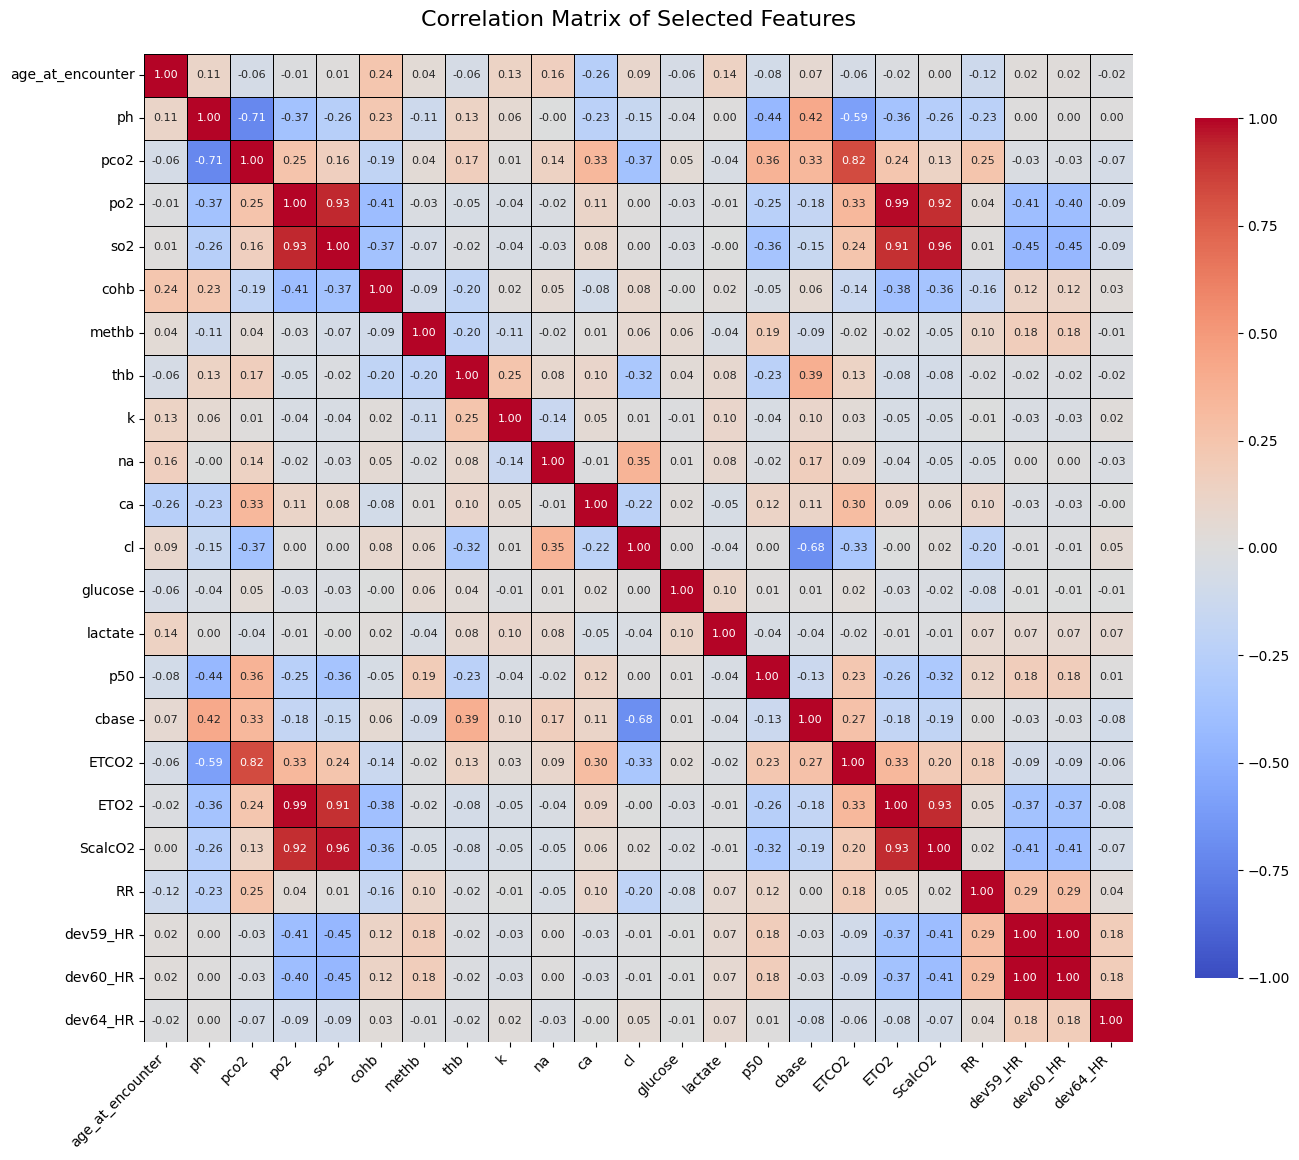

sample
10.0    160
5.0     151
1.0       1
Name: count, dtype: int64


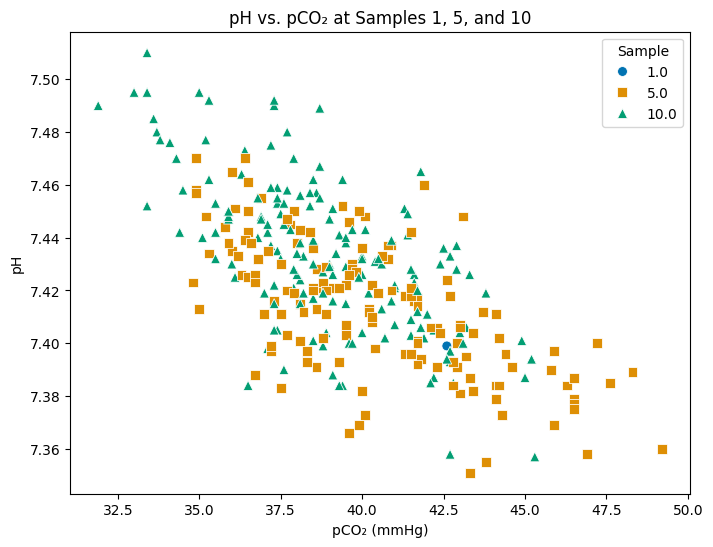

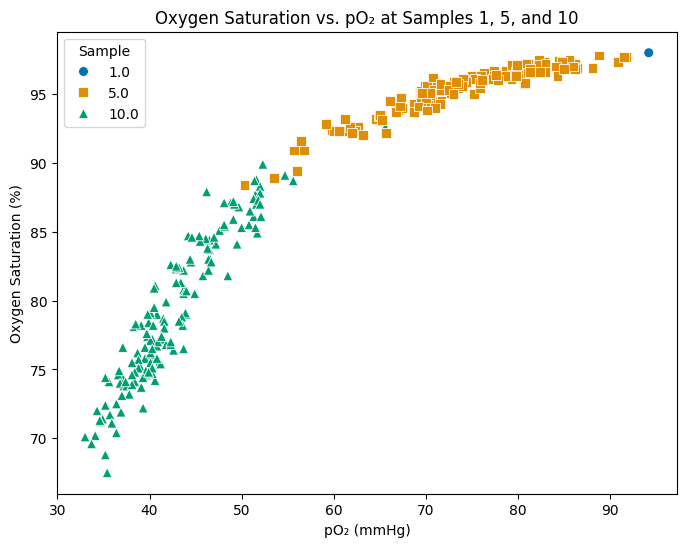

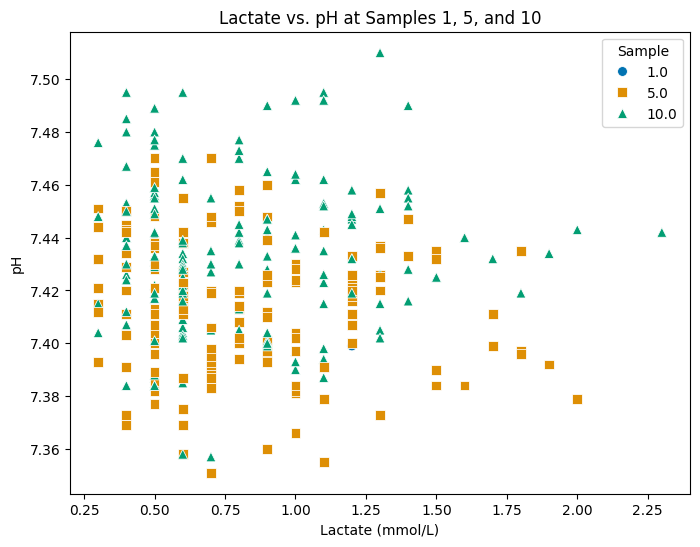

In [17]:
cols_to_use = [
    "age_at_encounter", "ph", "pco2", "po2", "so2", "cohb", "methb", "thb",
    "k", "na", "ca", "cl", "glucose", "lactate", "p50", "cbase", "ETCO2",
    "ETO2", "ScalcO2", "RR", "dev59_HR", "dev60_HR", "dev64_HR"
]

df_num = df_filtered[cols_to_use]
c_matrix = df_num.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    c_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
    annot_kws={"size": 8}, cbar_kws={"shrink": 0.8}, square=True,
    linewidths=0.5, linecolor="black"
)
plt.title("Correlation Matrix of Selected Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

samples_df = df_filtered[df_filtered["sample"].isin([1, 5, 10])]
print(samples_df["sample"].value_counts()) #check the number of samples for each sample number before the plots to have an idea about the distribution

sns.set_palette("colorblind")
marker_styles = {1: "o", 5: "s", 10: "^"} #make it easier to distinguish between the samples

def plot_scatter(data, x_col, y_col, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=data, x=x_col, y=y_col, hue="sample", style="sample",
        palette="colorblind", markers=marker_styles, s=50
    )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title="Sample")
    plt.show()

plot_scatter(samples_df, "pco2", "ph", "pH vs. pCO₂ at Samples 1, 5, and 10", "pCO₂ (mmHg)", "pH")
plot_scatter(samples_df, "po2", "so2", "Oxygen Saturation vs. pO₂ at Samples 1, 5, and 10", "pO₂ (mmHg)", "Oxygen Saturation (%)")
plot_scatter(samples_df, "lactate", "ph", "Lactate vs. pH at Samples 1, 5, and 10", "Lactate (mmol/L)", "pH")


Since I am not a specialist in the medical field, I will keep the correlation analysis simple.

## Age at Encounter and pH (Unexpected Correlation)

The data shows very little correlation between a person's age and their pH. This means that, in this instance, pH is not significantly impacted by age. While it is known that aging can influence various bodily balances, the stability of pH levels across different age groups was surprising, as it was somewhat expected that age would have a more pronounced effect on pH.

## Heart Rate Correlation (Expected Correlation)

There is a strong correlation among the heart rate values from devices such as dev59_HR, dev60_HR, and dev64_HR. This indicates that, over multiple encounters, these devices are providing consistent and accurate results, aligning with the expected consistency of related measurements.

## Overview of Expected vs. Unexpected Correlations

The expected outcome was the strong correlation between heart rate readings from different devices, demonstrating consistency in data collection. The unexpected finding, however, was the lack of a significant relationship between age and pH. While one might have anticipated some impact of age on pH levels, the dataset shows that pH remains stable across different age groups.


# Plot Analysis and Interpretation on 3 Cases

We'll simplify things and consider three scatter plots to explore data trends. We'll look at one with a decreasing trend, one with an increasing trend, and one with no strong connection.

## pH vs pCO₂ Scatter Plot for Samples 1, 5, and 10

This scatter plot shows that as pCO₂ goes up, pH goes down, meaning more pCO₂ makes blood more acidic. This fits with the concept of respiratory acidosis. We used different colors and shapes to tell apart the data from samples 1, 5, and 10. Sample 1 only has one data point left because we removed outliers, like errors from when devices are just starting up. This helps make results more reliable.

## SO₂ vs pO₂ Scatter Plot for Samples 1, 5, and 10

This scatter plot shows how Oxygen Saturation (SO₂) changes with pO₂. It has a classic “S” shape, where SO₂ rises quickly as pO₂ goes up, then flattens out. This pattern is what we’d expect: hemoglobin becomes fully loaded with oxygen at high pO₂. There were no big outliers here, meaning the data is likely solid.

## Lactate vs pH Scatter Plot for Samples 1, 5, and 10

The scatter plot for lactate and pH doesn’t show a strong link. This means, in this data, lactate levels don’t seem to depend much on pH changes, or maybe something else in the body is balancing pH. The scattered points show that people’s bodies might handle lactate differently.

## Conclusion

Using outlier detection, which left only one data point for sample 1, made the analysis more reliable by focusing on the clean data. Removing early data that could have errors makes the results clearer and easier to trust. This helps ensure we’re looking at true patterns and trends.


<div class="alert alert-success">
    
**Exercise**. Select 10 encounters at random. For these encounters, display the evaluation of the saturated O2 blood samples during a desaturation test as a function of the relative time since the start of the desaturation. Give your observations.

</div>

<div class="alert alert-danger">
    
**Advice**. It may be useful to filter out encounters that have a too long duration (too large difference between the maximum datetime and minimum datetime).

</div>

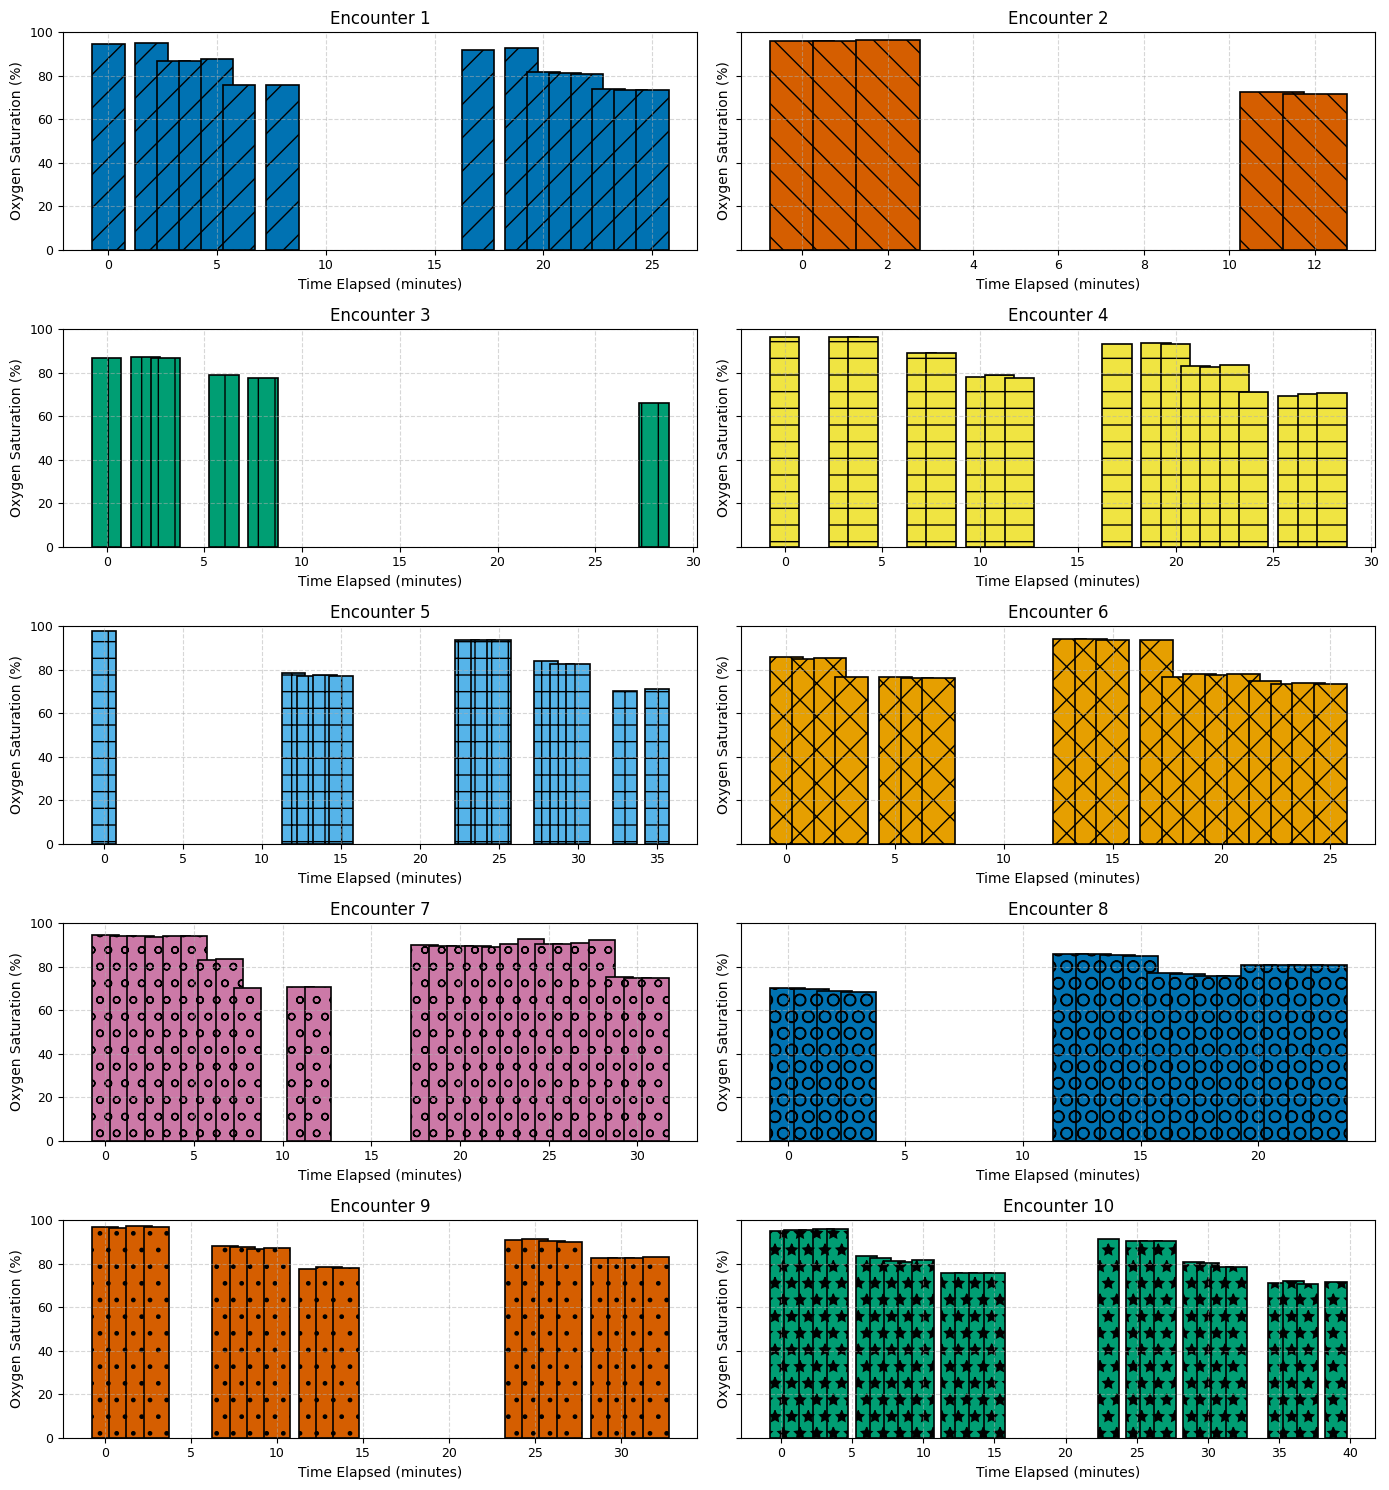

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
import math

sns.set_palette("colorblind")
df_filtered.loc[:, "datetime"] = pd.to_datetime(df_filtered["datetime"])
data = df_filtered[["encounter_id", "datetime", "so2"]]

times = data.groupby("encounter_id")["datetime"].agg(["min", "max"])
times["duration"] = times["max"] - times["min"]

max_duration = pd.Timedelta(hours=2)
valid_ids = times[times["duration"] <= max_duration].index
data = data[data["encounter_id"].isin(valid_ids)]

np.random.seed(42)
ids = data["encounter_id"].unique()
selected_ids = np.random.choice(ids, size=min(10, len(ids)), replace=False)

data = data[data["encounter_id"].isin(selected_ids)].copy()
data["elapsed_minutes"] = data.groupby("encounter_id")["datetime"].transform(
    lambda x: (x - x.min()).dt.total_seconds() / 60
)

data.sort_values(["encounter_id", "elapsed_minutes"], inplace=True)

cols = 2
rows = math.ceil(len(selected_ids) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3), sharey=True)
axes = axes.flatten()

colors = cycle(["#0072B2", "#D55E00", "#009E73", "#F0E442", "#56B4E9", "#E69F00", "#CC79A7"]) #colors blind friendly ref : https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3
hatches = cycle(["/", "\\", "|", "-", "+", "x", "o", "O", ".", "*"]) # to make it more readable and distinguishable 

for idx, encounter_id in enumerate(selected_ids): # I chosed barplots because I wanted just to visualize the tendency of the oxygen saturation and not precise values for my analysis. So I prioritized the visual aspect.
    ax = axes[idx]
    encounter_data = data[data["encounter_id"] == encounter_id]
    ax.bar(
        encounter_data["elapsed_minutes"],
        encounter_data["so2"],
        width=1.5,
        color=next(colors),
        edgecolor="black",
        linewidth=1.2,
        hatch=next(hatches),
    )
    ax.set_title(f"Encounter {idx + 1}", fontsize=12)
    ax.set_xlabel("Time Elapsed (minutes)", fontsize=10)
    ax.set_ylabel("Oxygen Saturation (%)", fontsize=10)
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis="both", labelsize=9)

for ax in axes[len(selected_ids):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### Analysis of the Plots and Interpretation

#### Encounter-Specific Observations

Here is a summary table with descriptions and interpretations for each encounter’s trends:

| Encounter | Description and Observations |
|-----------|------------------------------|
| **1**     | Shows a steady decline in oxygen levels with a brief stabilization period, possibly indicating a controlled desaturation phase or a temporary balance in oxygen saturation levels. |
| **2**     | Displays a rapid drop in oxygen saturation that stabilizes at a lower level, suggesting a sudden bodily response or a brief, intense event impacting oxygen levels. |
| **3**     | Minimal changes in oxygen levels, potentially reflecting good respiratory regulation or a stabilizing intervention during the test period. |
| **4**     | Shows a moderate decline with fluctuations, possibly due to changing conditions or intermittent interventions during the desaturation phase. |
| **5**     | Contains several minor dips and recoveries, indicating possible adjustments or compensatory responses during the testing period. |
| **6**     | Similar to Encounter 1, but with a more gradual and consistent decline, suggesting a slower, controlled decrease or a gradual weakening of respiratory capacity. |
| **7**     | Exhibits a fluctuating pattern with an overall downward trend, possibly due to stabilization efforts or sudden internal changes. |
| **8**     | Starts with a quick drop followed by a stable phase, suggesting rapid adaptation or the influence of an external stabilizing factor. |
| **9**     | Maintains consistently high oxygen levels without significant drops, making it an outlier that may reflect unique circumstances or effective intervention measures. |
| **10**    | Gradually decreases and eventually levels off, indicating a slow change without abrupt fluctuations. |

---

### Conclusion
- **Trends and Variability**: Encounters exhibit diverse trends, including gradual declines, sudden drops, and stable phases, reflecting variability in individual desaturation responses.
- **Potential Influences**: Factors such as the individual’s health, external interventions, and testing conditions could account for these variations.


<div class="alert alert-success">
    
**Exercise**. Now, load the saturation data from `data/waveforms/{ENCOUNTER_ID[0]}/{ENCOUNTER_ID}_2hz.csv`. Then, also load the infrared PPG data from `data/waveforms/{ENCOUNTER_ID[0]}/{ENCOUNTER_ID}_ppg.dat` using the `wfdb` package.

Only focus on the first 17 minutes of the time series. Beware that they use different sampling frequencies.
    
</div>

In [19]:
import os 
import wfdb

encounter_identifier = (
    "0241a26f4be08b7312eab3099fb7e044376d7d433d69cc15ed67742b0ecf95f5"
)
root_path = f"waveforms/{encounter_identifier[0]}/{encounter_identifier}"
saturation_file_path = f"{root_path}_2hz.csv"
sat_data = pd.read_csv(saturation_file_path)
#print(sat_data)
#print(sat_data.head())
samples_hz = 17*60*2 # 17 minutes of data at 2 Hz
sat_data_17min = sat_data.iloc[:samples_hz] # Select the first 17 minutes of data https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
#print(sat_data.shape)
# print(sat_data_17min.shape)
print("Oxygen saturation data shape before filtering:", sat_data.shape)
print("Oxygen satauration data shape (first 17 minutes):", sat_data_17min.shape)

##Read the PPG data using the wfdb library
ppg_path = f"{root_path}_ppg"
ppg_data = wfdb.rdrecord(ppg_path)
ppg_dataframe = pd.DataFrame(ppg_data.p_signal, columns=ppg_data.sig_name)
ppg_sampling_rate = ppg_data.fs
samples_ppg = int(17 * 60 * ppg_sampling_rate)
ppg_data_17min = ppg_dataframe.iloc[:samples_ppg]
print("PPG data shape before filtering:", ppg_dataframe.shape)
print("PPG data shape (first 17 minutes):", ppg_data_17min.shape)


Oxygen saturation data shape before filtering: (4923, 12)
Oxygen satauration data shape (first 17 minutes): (2040, 12)
PPG data shape before filtering: (264000, 2)
PPG data shape (first 17 minutes): (87720, 2)


The oxygen saturation data was originally sampled at 2 Hz and then filtered down to 2,040 samples, representing the first 17 minutes of data. By comparison, PPG data was recorded at a much higher frequency and then reduced to 87,720 samples in the same period of time. This will temporally align both datasets and enable a time-synchronized comparison and analysis of the measurements taken across the 17-minute window by both datasets at different sampling rates. This will descriptively allow for quite accurate and meaningful comparative analyses.


<div class="alert alert-success">
    
**Exercise**. Knowing the sampling rates of the two time series, match them and plot them together on the same figure. Give your observations.

</div>

Oxygen saturation data columns: Index(['Sample', 'ETCO2', 'ETO2', 'ScalcO2', 'RR', 'dev60_SpO2', 'dev60_HR',
       'dev60_PI', 'dev59_SpO2', 'dev59_HR', 'dev59_PI', 'Timestamp'],
      dtype='object')
PPG data columns: Index(['IR', 'RED'], dtype='object')


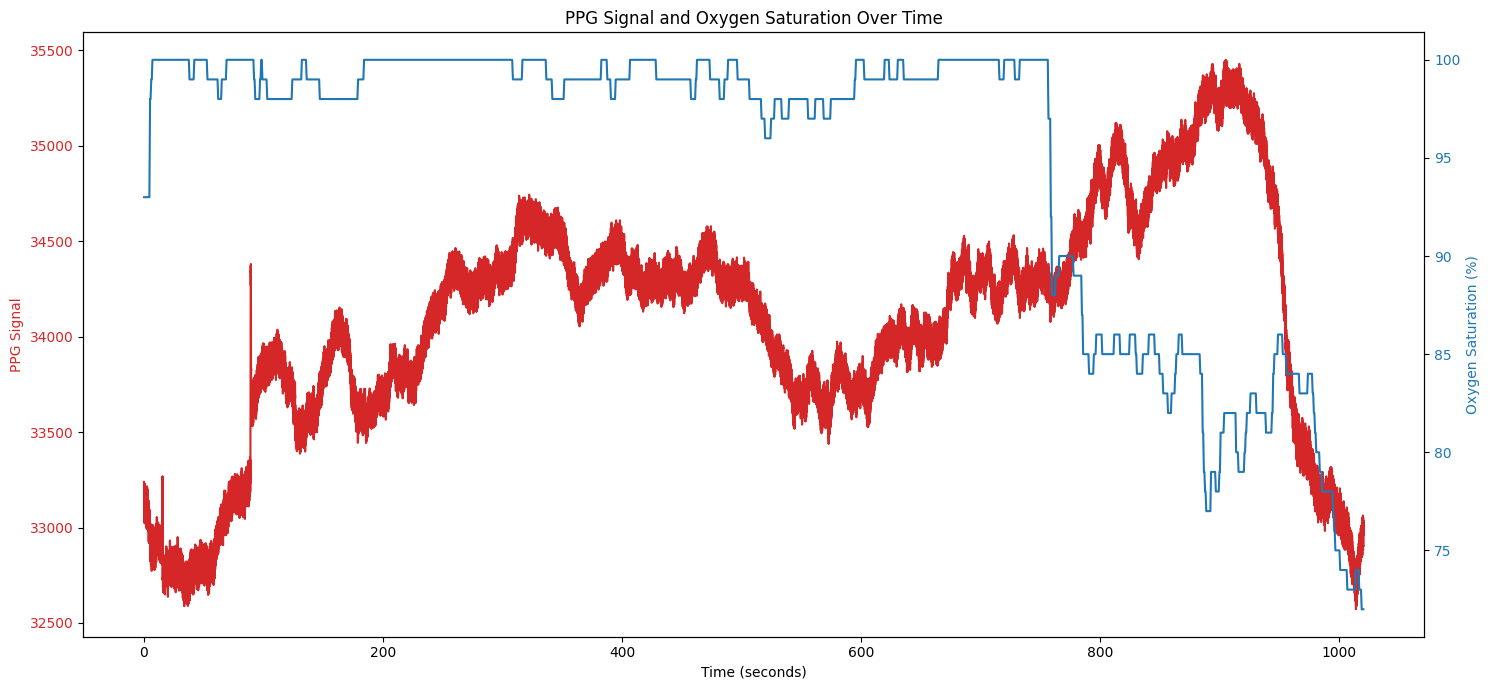

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

t_sat = np.arange(len(sat_data_17min)) / 2 
t_ppg = np.arange(len(ppg_data_17min)) / ppg_sampling_rate  

print("Oxygen saturation data columns:", sat_data_17min.columns)
print("PPG data columns:", ppg_data_17min.columns)

sat_signal = sat_data_17min['dev60_SpO2'].dropna().reset_index(drop=True) #can be dev55_SpO2 or dev60_SpO2
ppg_signal = ppg_data_17min['IR'].dropna().reset_index(drop=True)  

t_sat = t_sat[:len(sat_signal)]
t_ppg = t_ppg[:len(ppg_signal)]

interpolator = interp1d(t_sat, sat_signal, kind='linear', fill_value='extrapolate')
sat_interp = interpolator(t_ppg)

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('PPG Signal', color='tab:red')
ax1.plot(t_ppg, ppg_signal, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Oxygen Saturation (%)', color='tab:blue')
ax2.plot(t_ppg, sat_interp, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('PPG Signal and Oxygen Saturation Over Time')
fig.tight_layout()
plt.show()


# PPG Signal and Oxygen Saturation Overview

The **red line** of the PPG signal consists of a wave-like pattern with peaks indicating heartbeats. Variations in peak height or smoothness may indicate changes in blood flow and could imply issues with measurement accuracy.

The **blue line** represents oxygen saturation (SpO2) in arterial blood, typically remaining stable with occasional declines, which may suggest fluctuations in blood oxygen levels or minor inaccuracies in data collection.

### Importance of Analyzing Both Signals Together
When **oxygen saturation**, shown by the blue line, changes, the PPG signal (red line) often reflects corresponding shifts. This indicates that events leading to reductions in oxygen levels can also influence blood flow. Therefore, both signals are interconnected and offer valuable insights into bodily processes.
